In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_columns', None)

In [2]:
# load data with error handling to make sure data is loaded properly from correct path
try:
    df = pd.read_csv('../../data/created_datasets/world_cup/merge_wc_with_socioeconomic.csv')
    print('Data successfully loaded.')
except FileNotFoundError:
    print('Error: Data file not found. Check path.')

Data successfully loaded.


In [3]:
df.head()

,world_cup_year,host_country,team,max_stage,max_stage_numeric,matches_played,matches_won,goals_for,goals_against,start_date,Big5_flag,rank_date,clean_country,rank,gdp_per_capita_tminus0,gdp_per_capita_tminus1,gdp_per_capita_tminus2,gdp_per_capita_tminus3,norm_gdp_per_capita_tminus0,norm_gdp_per_capita_tminus1,norm_gdp_per_capita_tminus2,norm_gdp_per_capita_tminus3,hdi_tminus0,hdi_tminus1,hdi_tminus2,hdi_tminus3,norm_hdi_tminus0,norm_hdi_tminus1,norm_hdi_tminus2,norm_hdi_tminus3,life_expectancy_tminus0,life_expectancy_tminus1,life_expectancy_tminus2,life_expectancy_tminus3,norm_life_expectancy_tminus0,norm_life_expectancy_tminus1,norm_life_expectancy_tminus2,norm_life_expectancy_tminus3,mean_school_years_tminus0,mean_school_years_tminus1,mean_school_years_tminus2,mean_school_years_tminus3,norm_mean_school_years_tminus0,norm_mean_school_years_tminus1,norm_mean_school_years_tminus2,norm_mean_school_years_tminus3,median_age_tminus0,median_age_tminus1,median_age_tminus2,median_age_tminus3,norm_median_age_tminus0,norm_median_age_tminus1,norm_median_age_tminus2,norm_median_age_tminus3,skew_tminus0,skew_tminus1,skew_tminus2,skew_tminus3,norm_skew_tminus0,norm_skew_tminus1,norm_skew_tminus2,norm_skew_tminus3
0,1994,USA,Algeria,Did not qualify,0.0,0.0,0.0,0,0,1994-06-17,NaN,1994-06-14,Algeria,48.0,1525.540618,1831.048010,1802.693008,1759.112016,-0.420688,-0.404067,-0.405610,-0.407981,0.603,0.603,0.601,0.596,-0.429826,-0.429826,-0.441897,-0.472076,67.284,67.797,67.725,67.692,-0.141005,-0.087208,-0.094759,-0.098219,4.649519,4.466413,4.283306,4.100199,-0.942009,-0.997346,-1.052682,-1.108019,19,19,19,18,-1.512660,-1.512660,-1.512660,-1.631136,4.293798,4.009974,3.751260,4.525632,1.410751,1.246344,1.096483,1.545042
1,1998,France,Algeria,Did not qualify,0.0,0.0,0.0,0,0,1998-06-10,NaN,1998-05-20,Algeria,57.0,1603.366232,1628.761006,1616.831987,1466.948068,-0.416454,-0.415072,-0.415721,-0.423876,0.634,0.624,0.615,0.608,-0.242718,-0.303075,-0.357397,-0.399647,69.327,68.859,68.219,67.691,0.073238,0.024160,-0.042954,-0.098324,5.298505,5.143212,4.987919,4.832626,-0.745881,-0.792811,-0.839742,-0.886673,20,20,20,19,-1.394184,-1.394184,-1.394184,-1.512660,4.576276,4.227061,3.905280,4.594363,1.574377,1.372093,1.185699,1.584854
2,2002,Korea/Japan,Algeria,Did not qualify,0.0,0.0,0.0,0,0,2002-05-31,NaN,2002-05-15,Algeria,79.0,1937.464114,1896.300209,1772.928691,1596.118222,-0.398278,-0.400517,-0.407229,-0.416848,0.669,0.659,0.651,0.643,-0.031467,-0.091825,-0.140110,-0.188396,71.644,71.025,70.576,70.088,0.316214,0.251301,0.204216,0.153041,5.757431,5.683261,5.609091,5.453798,-0.607189,-0.629604,-0.652019,-0.698950,22,22,21,21,-1.157232,-1.157232,-1.275708,-1.275708,4.021582,3.666552,4.310014,3.946262,1.253068,1.047415,1.420144,1.209438
3,2006,Germany,Algeria,Did not qualify,0.0,0.0,0.0,0,0,2006-06-09,NaN,2006-05-17,Algeria,87.0,3660.661047,3233.133396,2816.993850,2283.772993,-0.304528,-0.327787,-0.350427,-0.379437,0.698,0.692,0.685,0.677,0.143569,0.107355,0.065105,0.016819,73.116,72.836,72.536,71.906,0.470577,0.441215,0.409755,0.343689,6.170000,5.979940,5.905770,5.831600,-0.482508,-0.539945,-0.562360,-0.584775,24,24,23,23,-0.920280,-0.920280,-1.038756,-1.038756,3.252396,2.984746,3.688879,3.366548,0.807513,0.652476,1.060348,0.873636
4,2010,South Africa,Algeria,Group stage,1.0,3.0,0.0,0,2,2010-06-11,0.478261,2010-05-26,Algeria,30.0,4912.785855,4235.429905,5180.918815,4167.451699,-0.236407,-0.273258,-0.221819,-0.276956,0.718,0.714,0.711,0.704,0.264284,0.240141,0.222034,0.179784,74.144,73.871,73.618,73.346,0.578380,0.549752,0.523221,0.494697,5.816667,6.053333,6.290000,6.230000,-0.589288,-0.517765,-0.446243,-0.464375,26,25,25,25,-0.683328,-0.801804,-0.801804,-0.801804,2.062262,2.890365,2.702332,2.491503,0.118122,0.597805,0.488886,0.366762


In [4]:
df['team'].unique()

array(['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Ecuador',
       'Egypt', 'England', 'France', 'Germany', 'Ghana', 'Greece',
       'Honduras', 'Iceland', 'Iran', 'Italy', 'Ivory Coast', 'Jamaica',
       'Japan', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand',
       'Nigeria', 'North Korea', 'Norway', 'Panama', 'Paraguay', 'Peru',
       'Poland', 'Portugal', 'Qatar', 'Republic of Ireland', 'Romania',
       'Russia', 'Saudi Arabia', 'Scotland', 'Senegal', 'Serbia',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Togo', 'Trinidad and Tobago', 'Tunisia',
       'Turkey', 'Ukraine', 'United States', 'Uruguay', 'Wales'],
      dtype=object)

In [5]:
df.columns.values

array(['world_cup_year', 'host_country', 'team', 'max_stage',
       'max_stage_numeric', 'matches_played', 'matches_won', 'goals_for',
       'goals_against', 'start_date', 'Big5_flag', 'rank_date',
       'clean_country', 'rank', 'gdp_per_capita_tminus0',
       'gdp_per_capita_tminus1', 'gdp_per_capita_tminus2',
       'gdp_per_capita_tminus3', 'norm_gdp_per_capita_tminus0',
       'norm_gdp_per_capita_tminus1', 'norm_gdp_per_capita_tminus2',
       'norm_gdp_per_capita_tminus3', 'hdi_tminus0', 'hdi_tminus1',
       'hdi_tminus2', 'hdi_tminus3', 'norm_hdi_tminus0',
       'norm_hdi_tminus1', 'norm_hdi_tminus2', 'norm_hdi_tminus3',
       'life_expectancy_tminus0', 'life_expectancy_tminus1',
       'life_expectancy_tminus2', 'life_expectancy_tminus3',
       'norm_life_expectancy_tminus0', 'norm_life_expectancy_tminus1',
       'norm_life_expectancy_tminus2', 'norm_life_expectancy_tminus3',
       'mean_school_years_tminus0', 'mean_school_years_tminus1',
       'mean_school_years_tmi

In [6]:
# cast rank_date to datetime for time series modeling
df['rank_date'] = df['rank_date'].astype('datetime64[ns]')

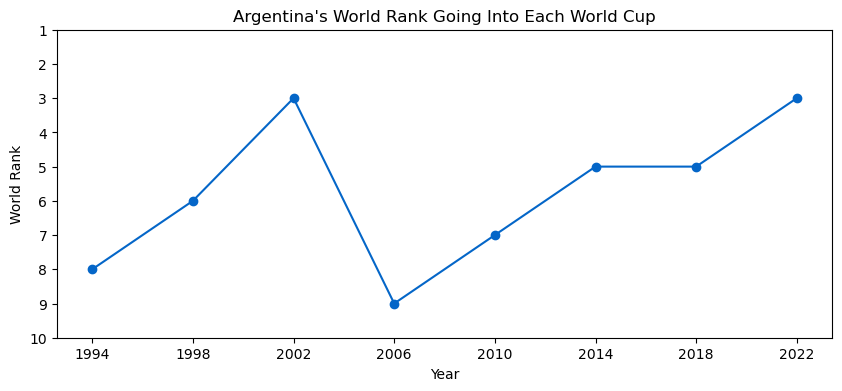

In [7]:
# eda: look at rank over time (by year) for specific country e.g. Argentina
plt.figure(figsize=(10, 4))
plt.plot(df[df['team']=='Argentina']['rank_date'].dt.strftime('%Y'), df[df['team']=='Argentina']['rank'].astype(int), 
         marker='o', color='#0466c8')
plt.title("Argentina's World Rank Going Into Each World Cup")
plt.xlabel('Year')
plt.ylabel('World Rank')

# set y limits and invert axis for clearer visualization
plt.ylim(1, 10)
plt.gca().invert_yaxis() # invert axis
plt.show()

Argentina has been in the top 10 world ranking each year going into the World Cup since 1994.

In [8]:
# add qualification flag - 1 for qualified, 0 for DNQ
df['max_stage_numeric'] = (df['max_stage_numeric']).astype(int)
df['qualified'] = (df['max_stage_numeric']>0).astype(int)
df.head()

,world_cup_year,host_country,team,max_stage,max_stage_numeric,matches_played,matches_won,goals_for,goals_against,start_date,Big5_flag,rank_date,clean_country,rank,gdp_per_capita_tminus0,gdp_per_capita_tminus1,gdp_per_capita_tminus2,gdp_per_capita_tminus3,norm_gdp_per_capita_tminus0,norm_gdp_per_capita_tminus1,norm_gdp_per_capita_tminus2,norm_gdp_per_capita_tminus3,hdi_tminus0,hdi_tminus1,hdi_tminus2,hdi_tminus3,norm_hdi_tminus0,norm_hdi_tminus1,norm_hdi_tminus2,norm_hdi_tminus3,life_expectancy_tminus0,life_expectancy_tminus1,life_expectancy_tminus2,life_expectancy_tminus3,norm_life_expectancy_tminus0,norm_life_expectancy_tminus1,norm_life_expectancy_tminus2,norm_life_expectancy_tminus3,mean_school_years_tminus0,mean_school_years_tminus1,mean_school_years_tminus2,mean_school_years_tminus3,norm_mean_school_years_tminus0,norm_mean_school_years_tminus1,norm_mean_school_years_tminus2,norm_mean_school_years_tminus3,median_age_tminus0,median_age_tminus1,median_age_tminus2,median_age_tminus3,norm_median_age_tminus0,norm_median_age_tminus1,norm_median_age_tminus2,norm_median_age_tminus3,skew_tminus0,skew_tminus1,skew_tminus2,skew_tminus3,norm_skew_tminus0,norm_skew_tminus1,norm_skew_tminus2,norm_skew_tminus3,qualified
0,1994,USA,Algeria,Did not qualify,0,0.0,0.0,0,0,1994-06-17,NaN,1994-06-14,Algeria,48.0,1525.540618,1831.048010,1802.693008,1759.112016,-0.420688,-0.404067,-0.405610,-0.407981,0.603,0.603,0.601,0.596,-0.429826,-0.429826,-0.441897,-0.472076,67.284,67.797,67.725,67.692,-0.141005,-0.087208,-0.094759,-0.098219,4.649519,4.466413,4.283306,4.100199,-0.942009,-0.997346,-1.052682,-1.108019,19,19,19,18,-1.512660,-1.512660,-1.512660,-1.631136,4.293798,4.009974,3.751260,4.525632,1.410751,1.246344,1.096483,1.545042,0
1,1998,France,Algeria,Did not qualify,0,0.0,0.0,0,0,1998-06-10,NaN,1998-05-20,Algeria,57.0,1603.366232,1628.761006,1616.831987,1466.948068,-0.416454,-0.415072,-0.415721,-0.423876,0.634,0.624,0.615,0.608,-0.242718,-0.303075,-0.357397,-0.399647,69.327,68.859,68.219,67.691,0.073238,0.024160,-0.042954,-0.098324,5.298505,5.143212,4.987919,4.832626,-0.745881,-0.792811,-0.839742,-0.886673,20,20,20,19,-1.394184,-1.394184,-1.394184,-1.512660,4.576276,4.227061,3.905280,4.594363,1.574377,1.372093,1.185699,1.584854,0
2,2002,Korea/Japan,Algeria,Did not qualify,0,0.0,0.0,0,0,2002-05-31,NaN,2002-05-15,Algeria,79.0,1937.464114,1896.300209,1772.928691,1596.118222,-0.398278,-0.400517,-0.407229,-0.416848,0.669,0.659,0.651,0.643,-0.031467,-0.091825,-0.140110,-0.188396,71.644,71.025,70.576,70.088,0.316214,0.251301,0.204216,0.153041,5.757431,5.683261,5.609091,5.453798,-0.607189,-0.629604,-0.652019,-0.698950,22,22,21,21,-1.157232,-1.157232,-1.275708,-1.275708,4.021582,3.666552,4.310014,3.946262,1.253068,1.047415,1.420144,1.209438,0
3,2006,Germany,Algeria,Did not qualify,0,0.0,0.0,0,0,2006-06-09,NaN,2006-05-17,Algeria,87.0,3660.661047,3233.133396,2816.993850,2283.772993,-0.304528,-0.327787,-0.350427,-0.379437,0.698,0.692,0.685,0.677,0.143569,0.107355,0.065105,0.016819,73.116,72.836,72.536,71.906,0.470577,0.441215,0.409755,0.343689,6.170000,5.979940,5.905770,5.831600,-0.482508,-0.539945,-0.562360,-0.584775,24,24,23,23,-0.920280,-0.920280,-1.038756,-1.038756,3.252396,2.984746,3.688879,3.366548,0.807513,0.652476,1.060348,0.873636,0
4,2010,South Africa,Algeria,Group stage,1,3.0,0.0,0,2,2010-06-11,0.478261,2010-05-26,Algeria,30.0,4912.785855,4235.429905,5180.918815,4167.451699,-0.236407,-0.273258,-0.221819,-0.276956,0.718,0.714,0.711,0.704,0.264284,0.240141,0.222034,0.179784,74.144,73.871,73.618,73.346,0.578380,0.549752,0.523221,0.494697,5.816667,6.053333,6.290000,6.230000,-0.589288,-0.517765,-0.446243,-0.464375,26,25,25,25,-0.683328,-0.801804,-0.801804,-0.801804,2.062262,2.890365,2.702332,2.491503,0.118122,0.597805,0.488886,0.366762,1


### Research Question 2: Are certain countries systematic over- or under-performers relative to their economic strength?

Assumption: We only look at countries who have qualified for the World Cup at least once since 1994. We also drop any rows that don't have complete non-NA socioeconomic indicators.

#### Methodology

We model performance in the World Cup using `max_stage_reached` on 4 economic indicators (GDP per capita, HDI, life expectancy, mean school years) using OLS (linear regression).

This allows us to benchmark actual outcomes against expected baselines, yielding residuals that identify systematic over- and underperformers.

Because the World Cup occurs every 4 years, we use a 3-year average of each development indicator leading up to each tournament. We don't consider development indicators for the year of the World Cup because by the time the World Cup is played, the team's preparation and qualification are already done.

Including the current year risks capturing shocks that didn’t actually influence the squad (e.g., Argentina’s 2022 GDP crash didn’t suddenly weaken Messi or the team).

Averaging the 3 years prior gives a cleaner measure of the structural conditions under which the team was built.

In [9]:
# extract only rows where country qualified (played in at least the group stages) for a World Cup
df = df[df['qualified']==1].copy()

# get 3-year average for each indicator
indicator = ['hdi', 'gdp_per_capita', 'life_expectancy', 'mean_school_years']
indicator_cols = [f'norm_{c}_tminus{i}' for c in indicator for i in range(1,4)]

# get average of indicators for 3 years leading up to world cup
avgs = df[indicator_cols].T.groupby(df[indicator_cols].columns.str.split("_tminus").str[0]).mean().T

# rename columns
avgs.columns = [f'{c}_avg' for c in avgs.columns]

# add average economic indicator columns back to main df
df = pd.concat([df, avgs], axis=1)

# clean up df to keep just relevant columns
df = df[['world_cup_year', 'team', 'max_stage_numeric', 'Big5_flag', 'norm_hdi_avg', 
         'norm_life_expectancy_avg', 'norm_gdp_per_capita_avg', 'norm_mean_school_years_avg']].copy().reset_index(drop=True)
df

,world_cup_year,team,max_stage_numeric,Big5_flag,norm_hdi_avg,norm_life_expectancy_avg,norm_gdp_per_capita_avg,norm_mean_school_years_avg
0,2010,Algeria,1,0.478261,0.213986,0.522556,-0.257344,-0.476128
1,2014,Algeria,2,0.478261,0.292451,0.626235,-0.178535,-0.606403
2,2006,Angola,1,0.000000,-1.361342,-1.832189,-0.427965,-1.263416
3,1994,Argentina,2,0.363636,0.417189,0.368193,-0.151305,0.148503
4,1998,Argentina,3,0.727273,0.521809,0.469843,-0.083544,0.230704
...,...,...,...,...,...,...,...,...
243,2010,Uruguay,4,0.304348,0.658619,0.811289,-0.022614,0.163714
244,2014,Uruguay,2,0.521739,0.793417,0.851943,0.398108,0.211564
245,2018,Uruguay,3,0.478261,0.892001,0.921714,0.463270,0.292153
246,2022,Uruguay,1,0.384615,0.968454,0.888995,0.438512,0.523846


In [10]:
# look at numerical statistics
df.describe()

,world_cup_year,max_stage_numeric,Big5_flag,norm_hdi_avg,norm_life_expectancy_avg,norm_gdp_per_capita_avg,norm_mean_school_years_avg
count,248.000000,248.000000,248.000000,248.000000,248.000000,247.000000,248.000000
mean,2008.451613,2.096774,0.423246,0.655832,0.594681,0.571903,0.459043
std,8.972612,1.534591,0.314374,0.824274,0.828147,1.029311,0.879533
min,1994.000000,1.000000,0.000000,-1.727510,-2.413081,-0.481140,-1.832155
25%,2002.000000,1.000000,0.136364,0.223543,0.347027,-0.297951,-0.145198
50%,2010.000000,2.000000,0.391304,0.843715,0.802568,0.192280,0.551683
75%,2018.000000,3.000000,0.652174,1.294886,1.176085,1.138480,1.204743
max,2022.000000,7.000000,1.000000,1.757123,1.669203,4.278188,1.956955


In [11]:
# look at non-null count and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   world_cup_year              248 non-null    int64  
 1   team                        248 non-null    object 
 2   max_stage_numeric           248 non-null    int64  
 3   Big5_flag                   248 non-null    float64
 4   norm_hdi_avg                248 non-null    float64
 5   norm_life_expectancy_avg    248 non-null    float64
 6   norm_gdp_per_capita_avg     247 non-null    float64
 7   norm_mean_school_years_avg  248 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.6+ KB


Here we notice that there's 1 null value in norm_gdp_per_capita_avg.

In [12]:
df[df['norm_gdp_per_capita_avg'].isna()]

,world_cup_year,team,max_stage_numeric,Big5_flag,norm_hdi_avg,norm_life_expectancy_avg,norm_gdp_per_capita_avg,norm_mean_school_years_avg
151,2010,North Korea,1,0.0,-0.110978,0.074811,NaN,0.013598


In [13]:
# we can drop the corresponding row containing the null value since it probably would not affect the modeling much
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 247
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   world_cup_year              247 non-null    int64  
 1   team                        247 non-null    object 
 2   max_stage_numeric           247 non-null    int64  
 3   Big5_flag                   247 non-null    float64
 4   norm_hdi_avg                247 non-null    float64
 5   norm_life_expectancy_avg    247 non-null    float64
 6   norm_gdp_per_capita_avg     247 non-null    float64
 7   norm_mean_school_years_avg  247 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 17.4+ KB


We can also do a pair plot to visualize how the 4 economic indicators are related to each other.

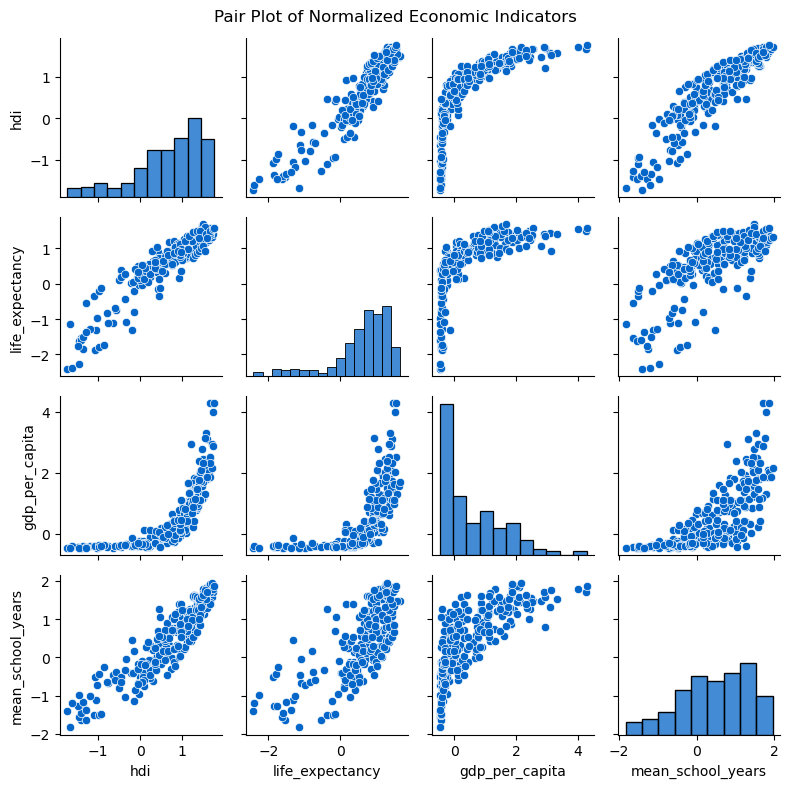

In [14]:
# visualize correlation
g = sns.pairplot(df[['norm_hdi_avg', 'norm_life_expectancy_avg', 'norm_gdp_per_capita_avg', 'norm_mean_school_years_avg']]\
                 .rename(columns={'norm_hdi_avg':'hdi', 'norm_life_expectancy_avg':'life_expectancy',
                                  'norm_gdp_per_capita_avg':'gdp_per_capita', 'norm_mean_school_years_avg':'mean_school_years'}), 
                 plot_kws={'color':'#0466c8'},
                 diag_kws={'color':'#0466c8'},
                 height=2)
g.fig.suptitle('Pair Plot of Normalized Economic Indicators')
plt.tight_layout()
plt.show()

In the above pair plot, we obesrve the following:

**HDI vs Life Expectancy**
- Strong positive correlation: countries with higher life expectancy tend to have higher HDI scores.

**HDI vs Mean School Years**
- Clear positive relationship: more years of schooling are associated with higher HDI, suggesting education is a key driver of development.

**HDI vs GDP per Capita**
- Positive but nonlinear: higher income levels generally align with higher HDI, though the relationship flattens at upper income levels.

**Life Expectancy vs Mean School Years**
- Moderate positive correlation: countries with better education also tend to have longer life expectancy, reflecting broader social development.

**GDP per Capita vs Other Indicators**
- Shows weaker or nonlinear relationships with life expectancy and schooling.
- Suggests that income alone doesn’t fully explain variation in health or education outcomes.

**Distributions (Histograms)**
- HDI and life expectancy are skewed toward higher values, indicating most countries in the dataset are relatively well-developed.
- GDP per capita shows a wider spread, with some countries significantly wealthier than others.
- Mean school years has a bimodal tendency, possibly reflecting differences between low- and high-income regions.

In [15]:
# for each country/year: get composite index for development score
# (norm_hdi_avg + norm_life_expectancy_avg + norm_gdp_per_capita_avg + norm_mean_school_years_avg) / 4
df = df.copy()
df['dev_score'] = df[['norm_hdi_avg', 'norm_life_expectancy_avg', 'norm_gdp_per_capita_avg', 'norm_mean_school_years_avg']]\
    .mean(axis=1) # composite index with mean as default
df

,world_cup_year,team,max_stage_numeric,Big5_flag,norm_hdi_avg,norm_life_expectancy_avg,norm_gdp_per_capita_avg,norm_mean_school_years_avg,dev_score
0,2010,Algeria,1,0.478261,0.213986,0.522556,-0.257344,-0.476128,0.000768
1,2014,Algeria,2,0.478261,0.292451,0.626235,-0.178535,-0.606403,0.033437
2,2006,Angola,1,0.000000,-1.361342,-1.832189,-0.427965,-1.263416,-1.221228
3,1994,Argentina,2,0.363636,0.417189,0.368193,-0.151305,0.148503,0.195645
4,1998,Argentina,3,0.727273,0.521809,0.469843,-0.083544,0.230704,0.284703
...,...,...,...,...,...,...,...,...,...
243,2010,Uruguay,4,0.304348,0.658619,0.811289,-0.022614,0.163714,0.402752
244,2014,Uruguay,2,0.521739,0.793417,0.851943,0.398108,0.211564,0.563758
245,2018,Uruguay,3,0.478261,0.892001,0.921714,0.463270,0.292153,0.642284
246,2022,Uruguay,1,0.384615,0.968454,0.888995,0.438512,0.523846,0.704952


#### Modeling

We want to measure relative performance vs expectation rather than strict classification. We used OLS for a continuous prediction of `max_stage_reached` which allows us to compute residuals (actual - predicted) and capture over-performance (positive residuals) vs under-performance (negative residuals).

In [16]:
# create class object for easy reuse
class WorldCupModel:
    def __init__(self, data, predictors, target):
        self.data = data
        self.predictors = predictors
        self.target = target
        self.model = None
        self.results = None

    def fit(self): # fit model
        try:
            X = sm.add_constant(self.data[self.predictors])
            y = self.data[self.target]
            
            self.model = sm.OLS(y, X)
            self.results = self.model.fit()

            print('Model fitted successfully.')
            
            return self.results
        except KeyError as e:
            print(f'Missing column: {e}. Check dataframe.')
        except np.linalg.LinAlgError:
            print('Regression failed due to singular matrix (possible multicollinearity).')
    
    def predict(self, new_data): # predict stage reached
        if self.results is None:
            raise ValueError('No model has been fitted yet.')
        X_new = sm.add_constant(new_data[self.predictors])
        return self.results.predict(X_new)
    
    def get_residuals(self): # function to get residuals (actual stage reached - predicted stage reached)
        if self.results is None:
            raise ValueError('No model has been fitted yet.')
        return self.results.resid

In [17]:
predictors = ['dev_score']
target = 'max_stage_numeric'

# look at fitting time
X = sm.add_constant(df[predictors])
y = df[target]
print('Running model fitting:')
%timeit sm.OLS(y, X).fit()

wc_model = WorldCupModel(df, predictors, target) # instantiate class
wc_model_results = wc_model.fit() # call method to fit

Running model fitting:
53.9 μs ± 1.4 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Model fitted successfully.


**Time complexity of the linear regression:**

Using `%timeit` to check runtime, fitting the OLS model only takes a few milliseconds. 

OLS involves computing $(X^TX)^{-1}X^Ty$. In terms of complexity, matrix inversion is roughly $O(n^3)$ where $n$ is the number of predictors. Since we're only using 1 predictor, the matrix inversion is constant time $O(1)$. The model runs through the dataset, which scales linearly with the number of rows of the data, so the overall time complexity is $O(n)$. For this dataset, the runtime is trivial.

In [18]:
print(wc_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:      max_stage_numeric   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     6.917
Date:                Thu, 04 Dec 2025   Prob (F-statistic):            0.00908
Time:                        14:50:26   Log-Likelihood:                -452.56
No. Observations:                 247   AIC:                             909.1
Df Residuals:                     245   BIC:                             916.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9224      0.118     16.278      0.0

Once a team makes it to the group stages of a World Cup, development indicators are positively associated with progression in the tournament. A one‑unit increase in development score corresponds to advancing roughly one‑third (0.3) of a stage further. However, the explanatory power is limited (R² ≈ 0.027), indicating that while development provides a slight advantage, there are possibly many other factors, e.g. football‑specific factors that determine how far teams progress.

Diagnostics: Skewness and kurtosis suggest the distribution of stage outcomes is non‑normal (heavy tails, skewed toward early exits), which is expected given the tournament structure. Knockout formats naturally create right-skew and heavy tails: most teams exit early, while a few powerhouses (and occasional surprises) make deep runs.

Socioeconomic development (`dev_score`) has a statistically significant but modest effect on performance once a team qualifies.

More developed countries tend to progress slightly further, but the explanatory power is weak - most of the variance in tournament progression is possibly driven by football‑specific factors (squad quality, tactics, confederation strength, matchups).

Once a nation is inside the tournament, socioeconomic factors aren't sufficient to predict how far a team will progress. Additional non-economic factors would likely be needed to improve the predictive capability of the model e.g.:
- Footballing tradition and culture (Brazil, Argentina, Germany).
- Generational talent cycles (Morocco 2022, Croatia 2018, Senegal 2002).
- Tactics, coaching, and federation stability.
- Tournament randomness (injuries, refereeing, knockout shocks).

However, for the purpose of this project and research question, we will continue to look at the OLS model with composite index `dev_score` as a predictor.

**Development is a gatekeeper, not a performance driver.**

In [19]:
# get the residuals from the model (actual - predicted)
df['residual'] = wc_model.get_residuals()

# identify & label over- vs under-performers vs as expected
df['perf_flag'] = np.where(
    df['residual']>0, 'overperformer', # actual > predicted: the model predicted the country to do worse based on the dev score
    np.where(
        df['residual']<0, 'underperformer', # actual < predicted: the model predicted the country to do better based on the dev score
        'as expected' # actual == predicted
    )
)
df

,world_cup_year,team,max_stage_numeric,Big5_flag,norm_hdi_avg,norm_life_expectancy_avg,norm_gdp_per_capita_avg,norm_mean_school_years_avg,dev_score,residual,perf_flag
0,2010,Algeria,1,0.478261,0.213986,0.522556,-0.257344,-0.476128,0.000768,-0.922690,underperformer
1,2014,Algeria,2,0.478261,0.292451,0.626235,-0.178535,-0.606403,0.033437,0.067102,overperformer
2,2006,Angola,1,0.000000,-1.361342,-1.832189,-0.427965,-1.263416,-1.221228,-0.540864,underperformer
3,1994,Argentina,2,0.363636,0.417189,0.368193,-0.151305,0.148503,0.195645,0.016419,overperformer
4,1998,Argentina,3,0.727273,0.521809,0.469843,-0.083544,0.230704,0.284703,0.988591,overperformer
...,...,...,...,...,...,...,...,...,...,...,...
243,2010,Uruguay,4,0.304348,0.658619,0.811289,-0.022614,0.163714,0.402752,1.951706,overperformer
244,2014,Uruguay,2,0.521739,0.793417,0.851943,0.398108,0.211564,0.563758,-0.098602,underperformer
245,2018,Uruguay,3,0.478261,0.892001,0.921714,0.463270,0.292153,0.642284,0.876861,overperformer
246,2022,Uruguay,1,0.384615,0.968454,0.888995,0.438512,0.523846,0.704952,-1.142720,underperformer


Residuals from the OLS model provide a direct measure of over‑ and under‑performance conditional on qualification. Positive residuals indicate countries that advanced further than expected given their development profile, while negative residuals indicate earlier exits than expected.

In [20]:
# take a look at top 5 over & under performers for WC2022
df_s2_2022 = df[df['world_cup_year']==2022].copy()

print('-------------------------', 'top 5 overperformers', '-------------------------', sep='\n')
print(df_s2_2022[(df_s2_2022['perf_flag']=='overperformer')]\
      .sort_values(by='residual', ascending=False)[['team', 'residual', 'perf_flag']][:5].to_string(index=False))
print('\n')
print('-------------------------', 'bottom 5 underperformers', '-------------------------', sep='\n')
print(df_s2_2022[(df_s2_2022['perf_flag']=='underperformer')]\
      .sort_values(by='residual', ascending=True)[['team', 'residual', 'perf_flag']][:5].to_string(index=False))

-------------------------
top 5 overperformers
-------------------------
     team  residual     perf_flag
Argentina  4.854604 overperformer
   France  3.624280 overperformer
  Croatia  2.782874 overperformer
  Morocco  2.095853 overperformer
   Brazil  0.977298 overperformer


-------------------------
bottom 5 underperformers
-------------------------
   team  residual      perf_flag
Denmark -1.512759 underperformer
Germany -1.479926 underperformer
 Canada -1.461045 underperformer
Belgium -1.432121 underperformer
  Wales -1.424771 underperformer


**Top Overperformers**
- Argentina (+4.85) - The largest positive residual, reflecting their World Cup victory. They advanced far beyond what socioeconomic indicators alone would predict.
- France (+3.62) - Reached the final, outperforming baseline expectations.
- Croatia (+2.78) - Continued their trend of deep tournament runs, reaching the semifinals despite modest development profile.
- Morocco (+2.10) - Historic semifinal run, the first African nation to reach this stage, a clear case of overperformance.
- Brazil (+0.98) - Advanced further than predicted, reflecting footballing culture and talent beyond economic indicators.

These teams exemplify how football-specific factors (talent pools, tactical cohesion, confederation strength) can drive success beyond socioeconomic baselines.

**Bottom Underperformers**
- Denmark (‑1.51) - Group-stage exit after being tipped as dark horses, underperforming relative to expectations.
- Germany (‑1.48) - Group-stage exit despite strong development profile - a clear underperformance.
- Canada (‑1.46) - Failed to progress despite relatively high development indicators, possibly reflecting inexperience at the global stage.
- Belgium (‑1.43) - Disappointing group-stage exit for their “golden generation,” underperforming relative to socioeconomic strength.
- Wales (‑1.42) - Early exit despite qualifying with a strong development baseline.

These cases highlight that development is not a performance driver inside the tournament. Even highly developed nations can falter due to tactical missteps, generational decline, or unfavorable matchups.

This confirms that economic development is a gatekeeper, not a driver of performance, and explains little of tournament progression. Instead, residuals reveal the real stories where Argentina, France, and Croatia are systematic overperformers and countries e.g. Germany and Belgium are underperformers. Morocco’s 2022 run stands out as a historic breakthrough, while Canada and Wales illustrate how structural development doesn’t guarantee success once inside the tournament.

We can also look at World Cup performance / progression over the years - whether a country is a consistent over- / under-performer or if they only peak once / twice.

In [21]:
# look at systematic over / under performers
country_perf = df.groupby('team')['residual']\
    .agg(['mean', 'max', 'count']).reset_index()\
        .rename(columns={'mean':'mean_residual', 'max':'max_residual', 'count':'num_qualifications'})

# use number of qualifications to weight systematic country performances
country_perf['weighted'] = country_perf['mean_residual'] * country_perf['num_qualifications']

print('-------------------------', 'top 5 consistent overperformers', '-------------------------', sep='\n')
print(country_perf\
      .sort_values('weighted', ascending=False).head()\
      .reset_index(drop=True))
print('\n')
print('-------------------------', 'top 5 one-off peaks', '-------------------------', sep='\n')
print(country_perf[country_perf['weighted']>0]\
      .sort_values(['num_qualifications', 'weighted'], ascending=[True, False]).head()\
      .reset_index(drop=True))

-------------------------
top 5 consistent overperformers
-------------------------
          team  mean_residual  max_residual  num_qualifications   weighted
0       Brazil       2.580210      5.225778                   8  20.641680
1       France       2.137744      4.827845                   7  14.964208
2      Germany       1.510548      4.548838                   8  12.084382
3    Argentina       1.290897      4.854604                   8  10.327180
4  Netherlands       1.473998      3.573953                   6   8.843988


-------------------------
top 5 one-off peaks
-------------------------
       team  mean_residual  max_residual  num_qualifications  weighted
0    Turkey       3.135441      3.135441                   1  3.135441
1   Ukraine       1.001607      1.001607                   1  1.001607
2  Bulgaria       0.570037      2.084487                   2  1.140074
3   Romania       0.565525      1.070688                   2  1.131051
4   Senegal       0.368739      1.477

**Consistent Overperformers**
- Brazil, France, Germany, Argentina, Netherlands
    - High `mean_residual` values across many qualifications (6–8 tournaments each).
    - Large weighted scores because they combine consistent positive residuals with frequent appearances.
    - This captures the idea of systematic overperformance: they don’t just have one great run, they repeatedly go further than development indicators would predict.

**One‑off Peaks**
- Turkey, Ukraine, Bulgaria, Romania, Senegal
    - Lower `num_qualifications` (1–3), but standout `max_residuals` from a single deep run (i.e. Turkey).
    - Their weighted scores are modest, reflecting limited appearances, but the peak residuals highlight breakthroughs.

From 1994–2022, Brazil, France, Germany, Argentina, and the Netherlands emerged as consistent overperformers, combining frequent qualifications with positive residuals across multiple tournaments. In contrast, nations like Turkey, stand out as one‑off peaks, achieving historic breakthroughs despite limited appearances. 

This dual perspective highlights both systematic tendencies and singular moments of overperformance.

In [22]:
# function for generating subplots for teams
def generate_team_plots(countries, title):
    """Function creates a 2x3 grid of subplots, where each subplot shows the residual values for a given team over 
        different World Cup years.

    Args:
        countries (list of str): List of team names (strings) to plot.
        title (str): Overall title for the figure, displayed above all subplots.
    
    Returns:
        None: Function displays the generated plots using matplotlib's interactive viewer but does not return any object.
    """
    # create subplots in a 2x3 grid
    fig, axes = plt.subplots(2, 3, figsize=(15,8), sharex=True, sharey=True)

    # flatten axes for easy iteration
    axes = axes.flatten()

    for i, country in enumerate(countries):
        subset = df[df['team'] == country]
        axes[i].plot(subset['world_cup_year'], subset['residual'], marker='o', linestyle='-', color='#0466c8')
        axes[i].axhline(0, color='black', linestyle='--', linewidth=1)
        axes[i].set_title(country)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Residual')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

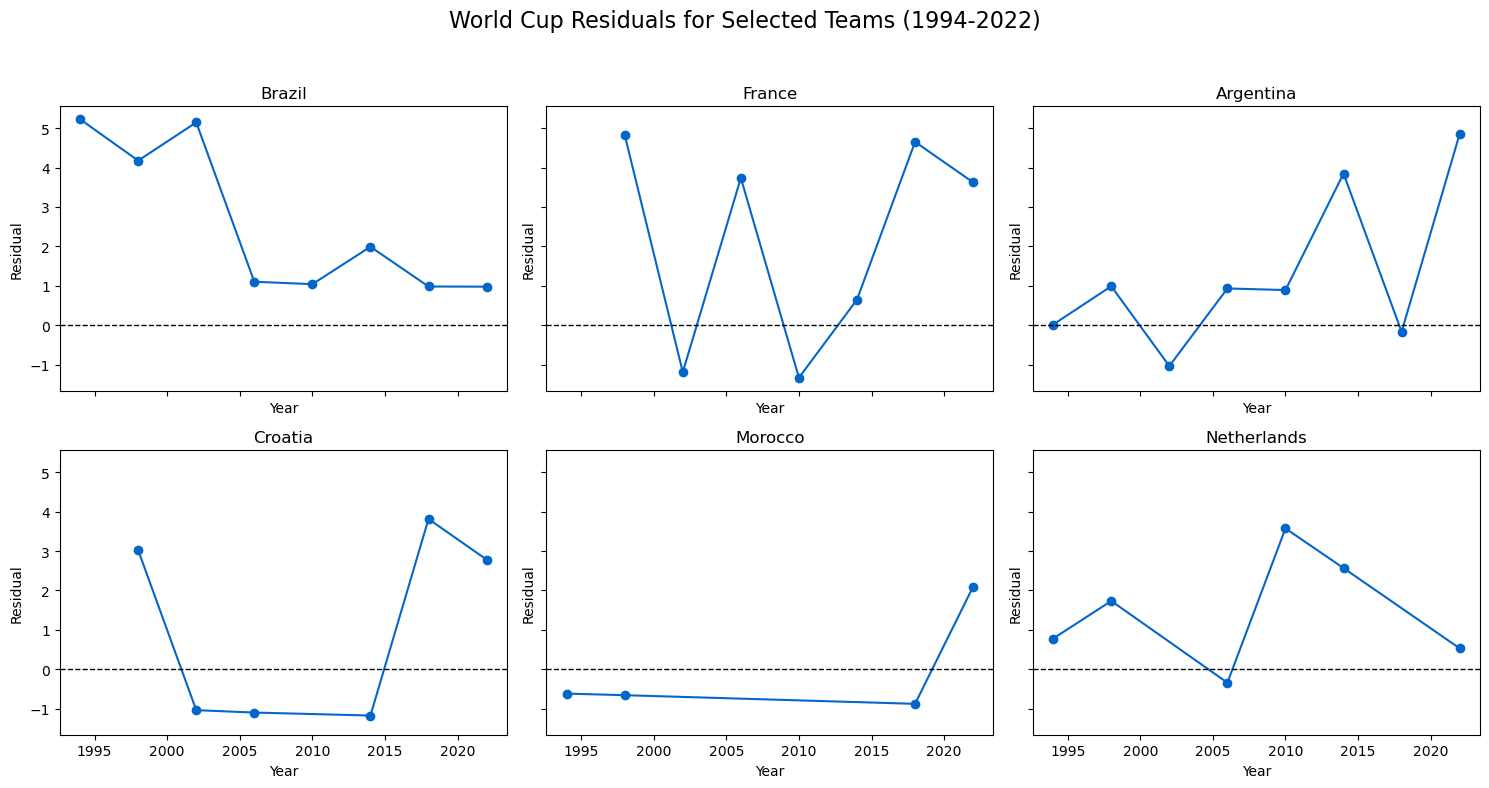

In [23]:
# select teams to view
countries = ['Brazil', 'France', 'Argentina', 'Croatia', 'Morocco', 'Netherlands']
generate_team_plots(countries, 'World Cup Residuals for Selected Teams (1994-2022)')


**Morocco**: 2022 was a breakout - a sharp spike after years of absence or modest performance, one-off peak behavior.

**Argentina**: The 2022 win stands out as a performance climax, but the subplot also shows they’ve had consistently positive residuals, reinforcing their status as a systematic overperformer.

**Brazil**: The visual decline is striking - from strong overperformance in earlier years to more muted or even neutral residuals recently.

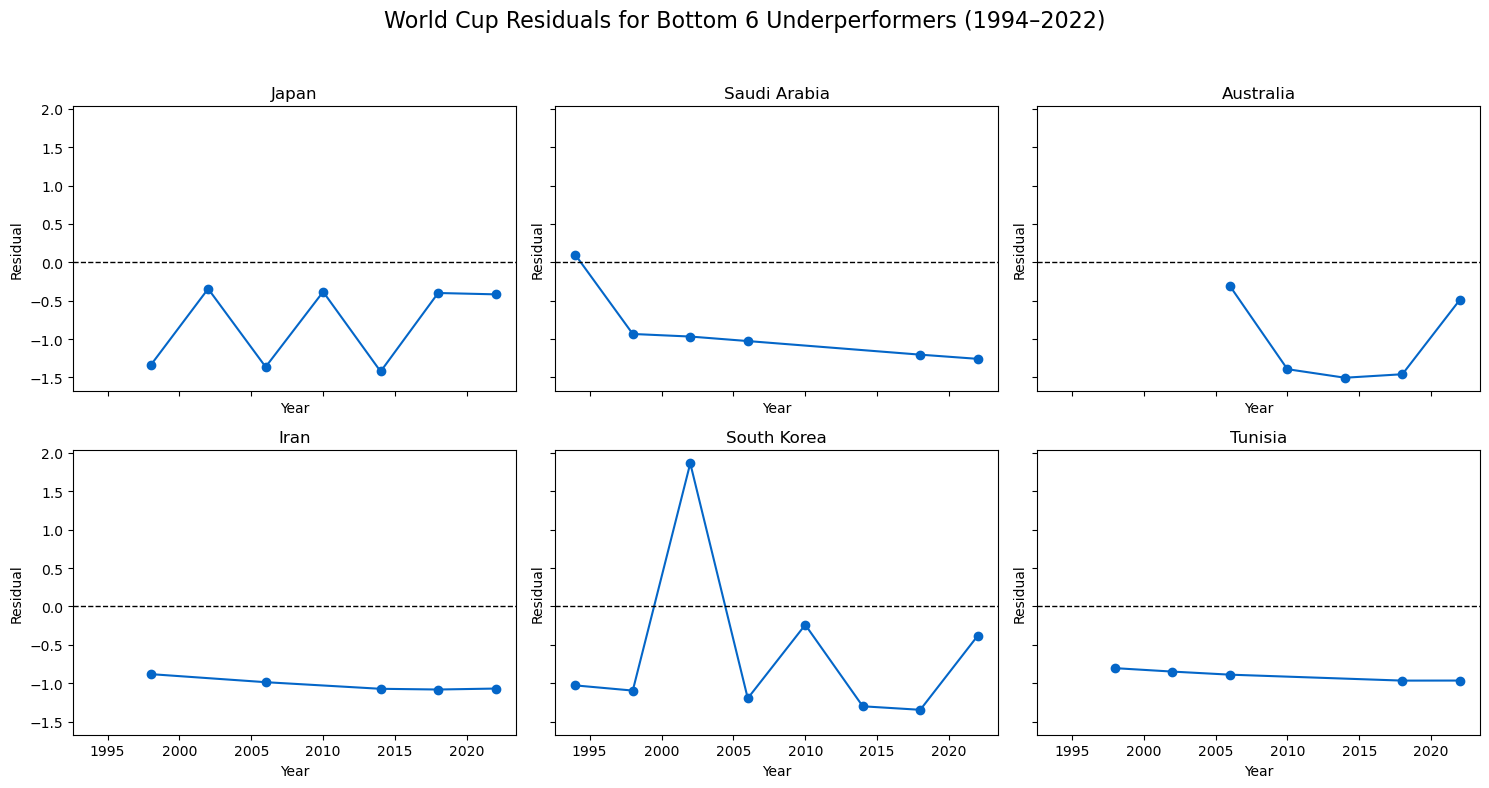

In [24]:
# get underperformers to plot
underperformers = country_perf.sort_values('weighted', ascending=True).head(6)['team'].values
generate_team_plots(underperformers, 'World Cup Residuals for Bottom 6 Underperformers (1994–2022)')


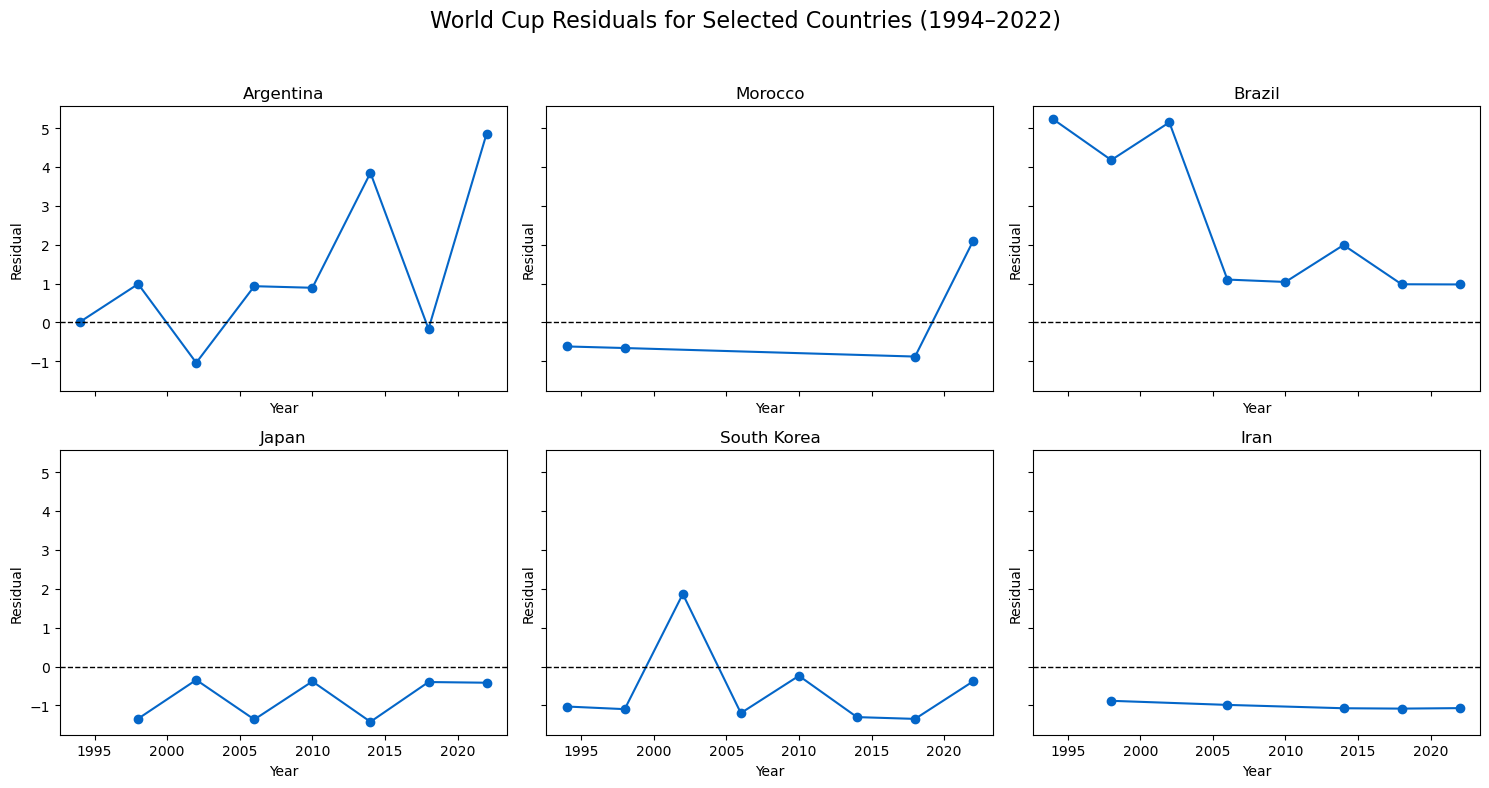

In [25]:
generate_team_plots(['Argentina', 'Morocco', 'Brazil', 'Japan', 'South Korea', 'Iran'], 
                    'World Cup Residuals for Selected Countries (1994–2022)')

**Japan**
- Qualified regularly (7 times since 1998).
- Residuals are negative because they usually exit in the Round of 16 or group stage.
- Their “best” runs (2018, 2022 Round of 16) still don’t exceed expectations relative to development indicators.

**Saudi Arabia**
- Frequent qualifications (6 times since 1994).
- Almost always group‑stage exits, except 1994 when they reached the Round of 16.
- Residuals stay negative because they rarely progress, even though their development indicators are relatively high.

**South Korea**
- 8 qualifications, mostly underperforming.
- The 2002 semifinal is the one big positive spike, but otherwise they fall short of expectations.
- Which is why their mean residual is negative but max residual is positive.

**Australia**
- 5 qualifications, usually group‑stage exits.
- 2006 Round of 16 was their best run, but overall they underperform relative to development.

**Iran**
- 5 qualifications, never past the group stage.
- Residuals consistently negative, reflecting structural underperformance, despite comparatively strong economic indicators.

**Tunisia**
- 5 qualifications, also never past the group stage.
- Like Iran, their residuals are persistently negative.

### Research Question 3: Talent Composition vs Performance – Does world-class talent help explain these deviations?

Since our OLS model in Research Question 2 only uses 4 socioeconomic indicators, the residuals capture everything else that drives progression e.g.
- Football-specific factors: tradition, tactical culture, federation strength, coaching quality
- Squad composition: proportion of players in Big 5 (elite) leagues, star power, depth
- Randomness: luck of the draw, penalties, injuries, refereeing decisions
- Other unmodeled socioeconomic indicators

We choose to model the residuals against proportion of a country's squad in the Big 5 leagues to test whether elite club representation explains additional variability in progression that the 4 socioeconomic indicators alone cannot.
- If yes → it means Big 5 proportion adds explanatory power beyond socioeconomic development.
- If no → it suggests Big 5 proportion doesn’t help explain the unexplained variation, at least not linearly.

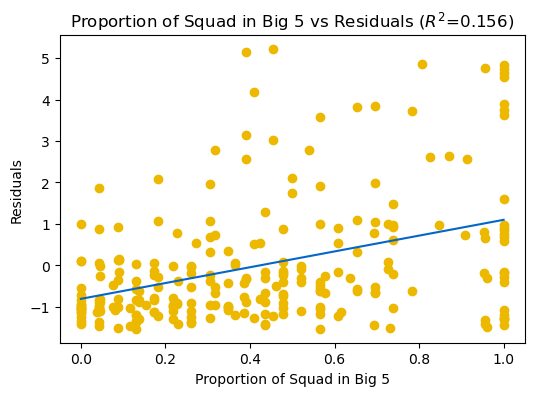

In [26]:
x = df['Big5_flag']
y = df['residual']

plt.figure(figsize=(6, 4))
plt.scatter(df['Big5_flag'], df['residual'], color='#edb800')
plt.plot(np.unique(df['Big5_flag']), 
         np.poly1d(np.polyfit(df['Big5_flag'], df['residual'], 1))(np.unique(df['Big5_flag'])), color='#0466c8')
plt.ylabel('Residuals')
plt.xlabel('Proportion of Squad in Big 5')
plt.title(f'Proportion of Squad in Big 5 vs Residuals ($R^2$={np.round(np.corrcoef(x, y)[0,1]**2, 3)})')
plt.show()

About 15% of the unexplained variation in progression (after accounting for the 4 socioeconomic indicators) can be explained by proportion of squad in the Big 5 European leagues. So football-specific capital (elite league representation) adds explanatory power beyond socioeconomic development. But while a higher proportion of Big 5 league players is associated with better tournament performance, the relationship is modest.

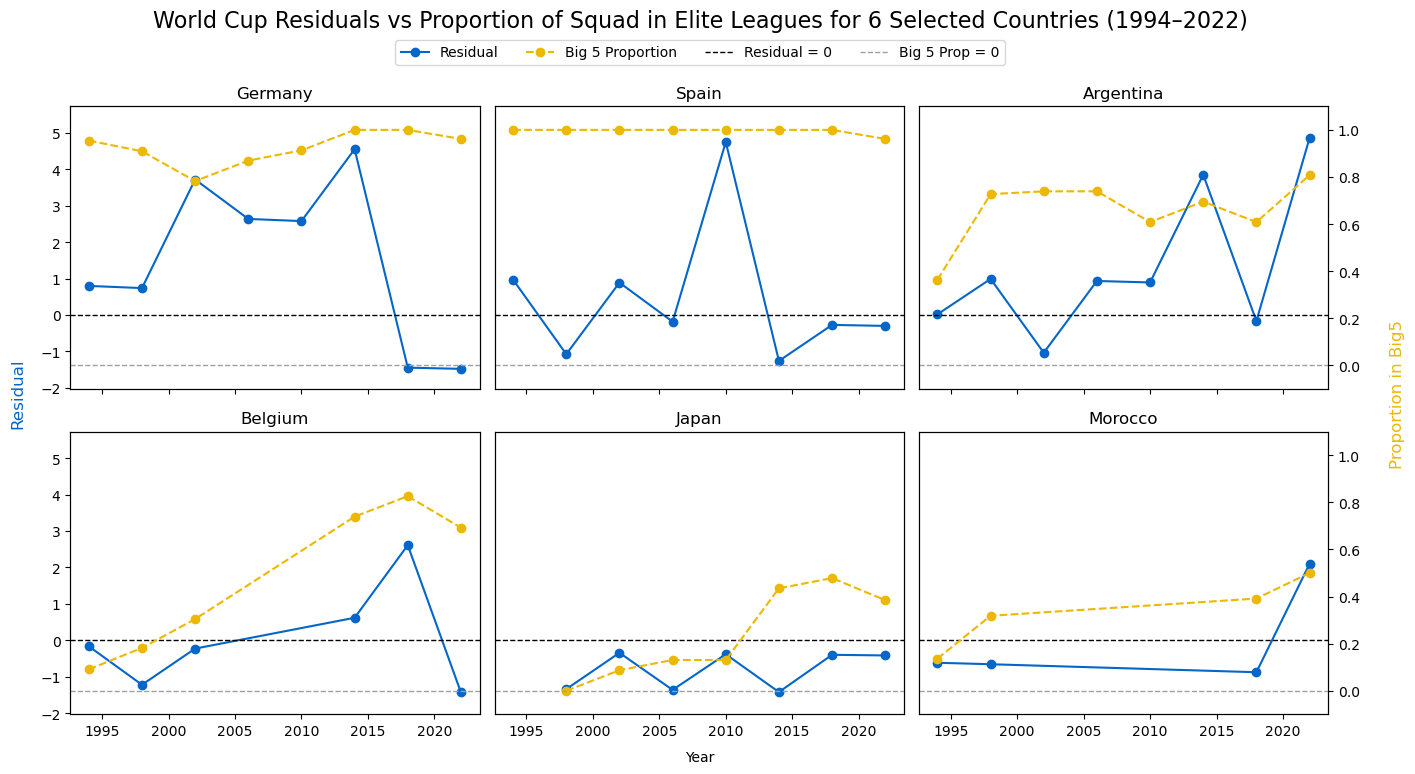

In [27]:
# generate subplots for selected countries to visualize residuals against proportion of squad also in the big 5 european leagues
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)
countries = ['Germany', 'Spain', 'Argentina', 'Belgium', 'Japan', 'Morocco']
# countries = ['Argentina', 'Morocco', 'Brazil', 'Japan', 'South Korea', 'Iran']

resid_min = df['residual'].min() - 0.5 # subtract / add 0.5 for cleaner axes visuals
resid_max = df['residual'].max() + 0.5

big5_min = df['Big5_flag'].min() - 0.1 # subtract / add 0.1 for cleaner axes visuals
big5_max = df['Big5_flag'].max() + 0.1

axes = axes.flatten()

line_handles = []

for i, country in enumerate(countries):
    df_country = df[df['team']==country]

    ax1 = axes[i]
    l1, = ax1.plot(df_country['world_cup_year'], df_country['residual'], marker='o', linestyle='-', label='Residual', c='#0466c8')
    ax2 = ax1.twinx()
    ax2.yaxis.set_ticks_position("right")
    l2, = ax2.plot(df_country['world_cup_year'], df_country['Big5_flag'], marker='o', linestyle='--', label='Big 5 Proportion', c='#edb800')

    ax1.set_ylim(resid_min, resid_max)
    ax2.set_ylim(big5_min, big5_max)

    hline1 = ax1.axhline(0, color='black', label='Residual = 0', linestyle='--', linewidth=1) # set 0 reference line for residuals
    hline2 = ax2.axhline(0, color="#a0a0a0", label='Big 5 Prop = 0', linestyle='--', linewidth=1) # set 0 reference line for big 5

    plt.title(f'{country}')

    if i == 0:
        line_handles.extend([l1, l2, hline1, hline2])

    # only keep left y-axis labels on first column
    if i%3 == 0:
        ax1.yaxis.set_ticks_position('left')
        ax1.yaxis.set_label_position('left')
    else:
        ax1.yaxis.set_visible(False) # hide left axis ticks/labels
    
    # only keep right y-axis labels on last column
    if i%3 == 2:
        ax2.yaxis.set_ticks_position('right')
        ax2.yaxis.set_label_position('right')
    else:
        ax2.yaxis.set_visible(False)

# add shared labels
fig.text(0.5, 0.04, 'Year', ha='center')
fig.text(0.04, 0.5, 'Residual', va='center', rotation='vertical', color='#0466c8', fontsize=12)
fig.text(0.96, 0.5, 'Proportion in Big5', va='center', rotation='vertical', color='#edb800', fontsize=12)

fig.legend(handles=line_handles, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=4)
plt.suptitle('World Cup Residuals vs Proportion of Squad in Elite Leagues for 6 Selected Countries (1994–2022)', fontsize=16)
plt.tight_layout(rect=[0.05,0.05,0.95,0.95])
plt.show()

Talent composition (Big 5 share) is loosely correlated with performance, but not deterministically.

While countries like Belgium, Morocco and Argentina show alignment between elite club affiliation and overperformance, others like Germany and Spain demonstrate that high Big 5 proportions do not immunize against failure. 

On the other hand, Japan’s case illustrates that high Big 5 representation does not automatically imply over-performance.